In [7]:
print("hello ifland!")

hello ifland!


In [8]:
## import packages
import pandas as pd
import matplotlib.pyplot as plot
plot.rc('font', family='D2Coding')
import seaborn as sns

In [9]:
## read data
df = pd.read_csv("result_masked.csv")

In [11]:
df.groupby(['사다리 결과'])['시간(초)'].mean()

사다리 결과
목록형      334.500000
오픈월드형    419.315789
Name: 시간(초), dtype: float64

df.groupby(['사다리 결과'])['시간(초)'].max()

In [10]:
print("목록형보다 오픈월드형에")
print(419.315789 / 334.500000)
print("배 더 길게 체류한다.")

목록형보다 오픈월드형에
1.2535599073243646
배 더 길게 체류한다.


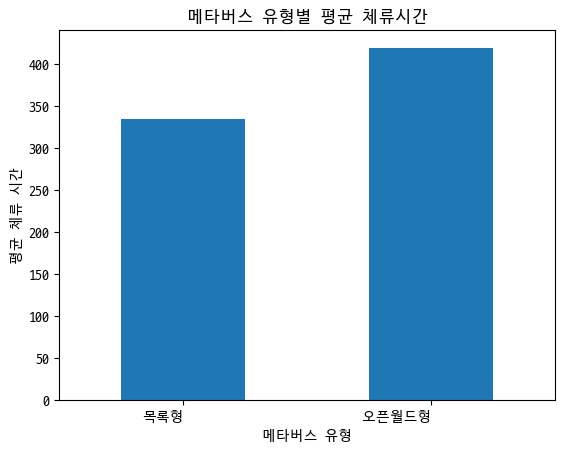

In [12]:
dfg = df.groupby(['사다리 결과'])['시간(초)'].mean()
ax = dfg.plot(kind='bar', title='메타버스 유형별 평균 체류시간', ylabel='평균 체류 시간', xlabel='메타버스 유형')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

plot.savefig('average_diff.png')
plot.savefig('average_diff.pdf')

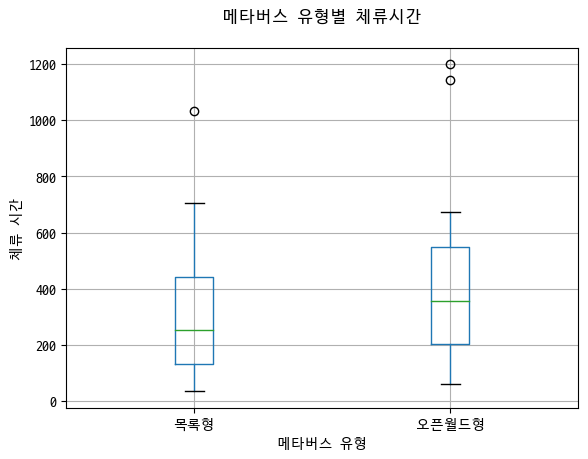

In [13]:
df.boxplot(column='시간(초)',by='사다리 결과')
plot.suptitle('메타버스 유형별 체류시간') 
plot.title('')
plot.xlabel('메타버스 유형')
plot.ylabel('체류 시간')

plot.savefig('box_diff.png')
plot.savefig('box_diff.pdf')


array([<AxesSubplot:title={'center':'목록형'}>,
       <AxesSubplot:title={'center':'오픈월드형'}>], dtype=object)

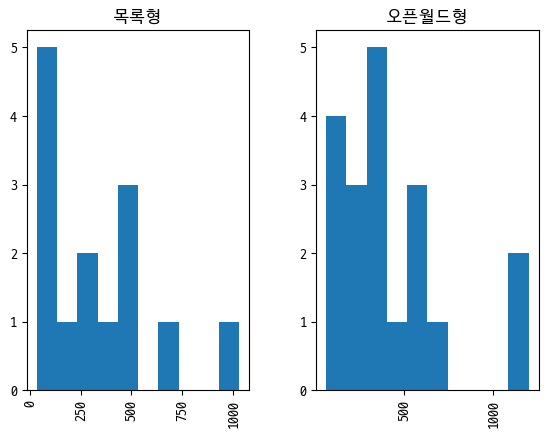

In [15]:
df['시간(초)'].hist(by=df['사다리 결과'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


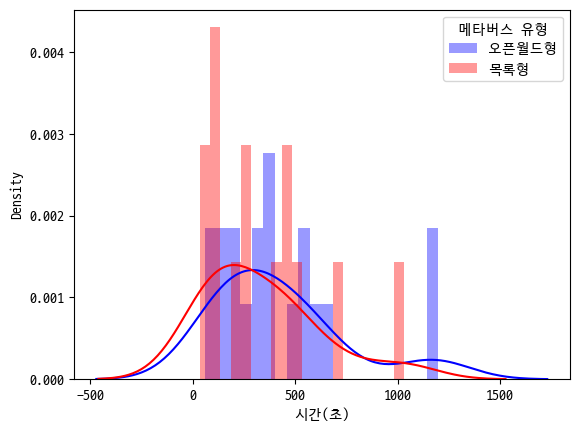

<Figure size 640x480 with 0 Axes>

In [14]:
sns.distplot(df[df['사다리 결과'] == "오픈월드형"]["시간(초)"], color="blue", label="오픈월드형", bins=20)
sns.distplot(df[df['사다리 결과'] == "목록형"]["시간(초)"], color="red", label="목록형", bins=20)

plot.legend(title='메타버스 유형')
plot.show()

plot.savefig('dist_diff.png')
plot.savefig('dist_diff.pdf')


In [16]:
data = df[['사다리 결과','시간(초)']]

In [17]:
# 각 메타버스별 실험자 수 갯수
data['사다리 결과'].value_counts()

오픈월드형    19
목록형      14
Name: 사다리 결과, dtype: int64

In [19]:
# 메타버스별 이탈 시간
order = data.sort_values(by=['사다리 결과','시간(초)'])
order

,사다리 결과,시간(초)
12,목록형,35
29,목록형,45
3,목록형,100
27,목록형,130
14,목록형,134
8,목록형,189
4,목록형,254
7,목록형,255
16,목록형,431
5,목록형,439


In [22]:
# 목록형 메타버스의 이탈 시간대
list_point = list(order['시간(초)'][:14])
# 오픈월드형 메타버스의 이탈 시간대
open_point = list(order['시간(초)'][14:])

In [23]:
# 시간대별 접속자수로 데이터 변환
new_df = []
max_list = 14
max_open = 19
diff_df = []

for i in range(1, 1300):
    new_df.append([i, '목록형', max_list/14 * 100])
    new_df.append([i, '오픈월드형', max_open/19 * 100])

    if (max_list/14) != 0:
        diff_df.append([i, ((max_open/19)/(max_list/14))])

    if i in list_point:
        max_list -= 1

    if i in open_point:
        max_open -= 1

dfs = pd.DataFrame(new_df,columns=['시간(초)', '메타버스 유형', '접속자 수'])
dfs_diff = pd.DataFrame(diff_df,columns=['시간(초)', '접속자수 상대비율(오픈월드형/목록형)'])

dfs

,시간(초),메타버스 유형,접속자 수
0,1,목록형,100.0
1,1,오픈월드형,100.0
2,2,목록형,100.0
3,2,오픈월드형,100.0
4,3,목록형,100.0
...,...,...,...
2593,1297,오픈월드형,0.0
2594,1298,목록형,0.0
2595,1298,오픈월드형,0.0
2596,1299,목록형,0.0


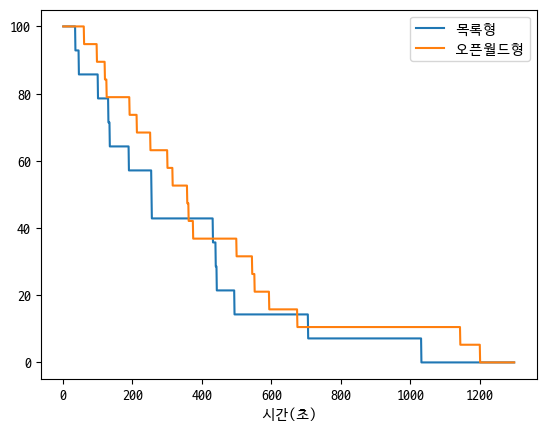

In [24]:
# 유형별 리텐션 그래프
dfs.set_index('시간(초)', inplace=True)
dfs.groupby('메타버스 유형')['접속자 수'].plot(legend=True)

plot.savefig('survival_diff.png')
plot.savefig('survival_diff.pdf')

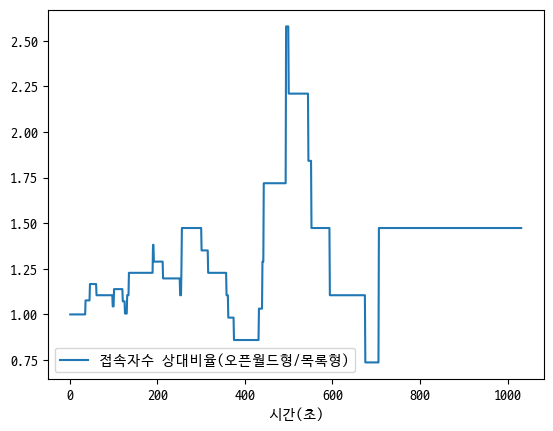

In [25]:
# 리텐션 비율
dfs_diff.set_index('시간(초)', inplace=True)
dfs_diff.plot(legend=True)

plot.savefig('survival_ratio.png')
plot.savefig('survival_ratio.pdf')

In [27]:
# 평균 리텐션 차이
dfs_diff['접속자수 상대비율(오픈월드형/목록형)'].mean()

1.338718943520107